<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/ANN_segmentacao_e_salva_TODAS_FotoS_v02_junho_18_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [7]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


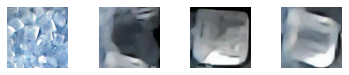

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [9]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [10]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

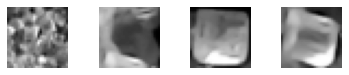

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [13]:
#sparse_softmax_cross_entropy_with_logits()

In [14]:
#Define data train and data test
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [15]:
#print(len(yw_train))
#print(len(yw_test))

In [16]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta da rede
test_images=W_test
test_labels=yw_test

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.3854 - accuracy: 0.4295
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0363 - accuracy: 0.5689
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8856 - accuracy: 0.6483
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.7083
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7675 - accuracy: 0.6872
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7674 - accuracy: 0.6661
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7346 - accuracy: 0.6953
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.7229
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7245
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.7536


In [20]:
'''
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)
'''

"\npredictions = model.predict(train_images) #x_test[:3])\nprint('predictions shape:', predictions.shape)\n"

In [21]:
#print(predictions)
#print(train_images.shape)

In [22]:
'''
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)
'''

'\nresult = model.evaluate(train_images) # esta estranho\nprint(result)\nresult = model.predict(train_images) # esta estranho\nprint(result)\n'

In [23]:
#ANN das imagens recortadas por nós
x=images28 
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 4 2 2 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 1 1 1 1 3 3 2 2 2 3 3 3 3 3 1 1
 1 1 2 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 1 2 2 2 3 2 3 3 3 3 3 3 2 1 1 1
 1 1 1 1 4 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 3 3 3 3 3 3 2 3 3 3 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 4 2 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 1 2 2 2 3 2 3 3 2 2 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2
 2 2 2 2 2 2 1 2 2 2 3 2 3 3 3 3 2 3 3 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 1 1 2 4 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 2 1 2 1 1 2 3
 3 2 3 2 3 3 3 3 1 1 1 1 1 4 1 1 1 1 1 1 4 2 1 2 2 2 2 2 1 1 2 2 2 1 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 2 2 2 2 2 1 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 2 2 1 2 2 3 2 3 2 3 2 3 3 3 3 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 4 4 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 2 2 2 2 2 3 3 2 2 3 3 3 2 3 1 1 1 1 1 1 1 1 1 1 4 1 2 4 1 1 2
 2 2 4 4 1 1 4

In [24]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

     y_Actual  y_Predicted
0           1            1
1           1            1
2           1            1
3           1            1
4           1            1
..        ...          ...
877         4            1
878         4            1
879         4            2
880         4            1
881         4            1

[882 rows x 2 columns]


In [25]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3   4
Actual                      
1          347    9    1   3
2           42  131    0   7
3            1   26  151   2
4           81   64    1  16


In [26]:
import sklearn
y_true = df['y_Actual']
y_pred = df['y_Predicted']

print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.96      0.84       360
           2       0.57      0.73      0.64       180
           3       0.99      0.84      0.91       180
           4       0.57      0.10      0.17       162

    accuracy                           0.73       882
   macro avg       0.72      0.66      0.64       882
weighted avg       0.72      0.73      0.69       882



In [27]:
# Segmentation: start here......

In [28]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [29]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [30]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [31]:
print(img.shape)

(1200, 1200)


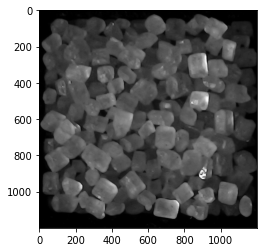

In [32]:
plt.imshow(img, cmap = "gray")

In [33]:
a=0
b=1200
c=100
d=200
Num=12
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


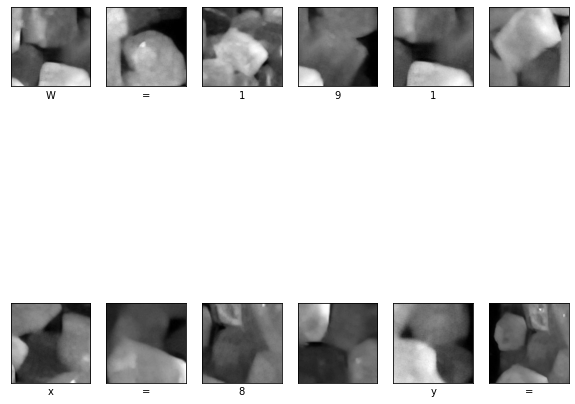

In [34]:
Num=12
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(2,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(nome[i])
plt.show()


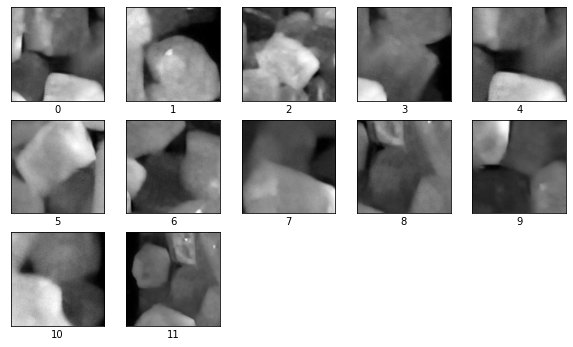

In [35]:
Num=12
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(i)
plt.show()

In [36]:
Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4
Tipos=['G','I','V','I','G','V','B','B','V','I','G','G']

In [37]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [38]:
print(np.array(ww[0]))

[[ 79  79  79 ...  57  60  64]
 [ 79  80  82 ...  53  60  61]
 [ 83  80  80 ...  55  56  64]
 ...
 [104 105 105 ... 121 117 114]
 [105 105 106 ... 121 120 111]
 [104 105 104 ... 117 121 114]]


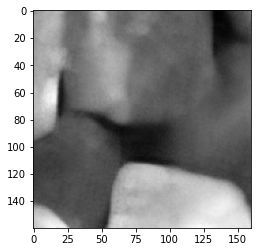

In [39]:
plt.imshow(ww[0], cmap = "gray")

In [40]:
Num=12
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(12, 28, 28)


In [41]:
#ANN da imagem grande
x=img28_all
logits = model(x, training=False)
prediction_all = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction_all)

tf.Tensor([3 4 1 2 3 1 3 2 2 3 2 2], shape=(12,), dtype=int32)


In [42]:
Num=12
img28_ravel_all=[]
for i in range(Num):
  img28_ravel=np.copy(img28_all[i].ravel())
  img28_ravel_all.append(img28_ravel)
  # img28_ravel_all.append(img28_all[i].ravel())

In [43]:
img28_ravel_all=pd.DataFrame(img28_ravel_all)
img28_ravel_all.insert(0,"Type",Tipos,True)
print(img28_ravel_all)

   Type           0           1  ...         781         782         783
0     G   84.168121   90.005623  ...  120.578125  119.621246  116.786240
1     I   68.892677   69.758354  ...   47.376675   26.116106   10.616162
2     V   65.715912   79.452789  ...   61.843334   60.452488   66.061989
3     I   55.504131   52.380165  ...    6.900826    1.586777    0.561984
4     G   67.559296   75.140358  ...  115.438019  111.425095   94.211914
5     V   72.702980   72.657425  ...   97.292709  103.143433  105.744843
6     B   72.507004   79.393753  ...   91.250984   91.310600   88.357872
7     B   29.883896   27.556328  ...  136.513275  158.597092  170.384094
8     V   26.984249   22.593571  ...   76.956100   74.734085   72.547142
9     I  135.559998  136.199997  ...  115.439995  117.839996  121.759995
10    G   63.345242   61.314995  ...   15.288846    7.563080    1.514574
11    G    1.064472    0.976207  ...   73.952744   71.950043   66.661034

[12 rows x 785 columns]


In [44]:
# found drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [45]:
img28_ravel_all.to_csv('img28_ravel_all.csv',float_format="%.5f")
# save in drive
!cp img28_ravel_all.csv drive/My\ Drive/Maria_Gabriela_Textura_dados_jan_2020/

In [46]:
img28_ravel_all=img28_ravel_all.drop(['Type'], axis = 1) 
print(img28_ravel_all)

           0           1           2    ...         781         782         783
0    84.168121   90.005623   93.035629  ...  120.578125  119.621246  116.786240
1    68.892677   69.758354   70.046867  ...   47.376675   26.116106   10.616162
2    65.715912   79.452789   73.867149  ...   61.843334   60.452488   66.061989
3    55.504131   52.380165   48.396698  ...    6.900826    1.586777    0.561984
4    67.559296   75.140358   83.273544  ...  115.438019  111.425095   94.211914
5    72.702980   72.657425   73.103104  ...   97.292709  103.143433  105.744843
6    72.507004   79.393753   83.376389  ...   91.250984   91.310600   88.357872
7    29.883896   27.556328   28.711267  ...  136.513275  158.597092  170.384094
8    26.984249   22.593571   32.582649  ...   76.956100   74.734085   72.547142
9   135.559998  136.199997  139.839996  ...  115.439995  117.839996  121.759995
10   63.345242   61.314995   56.924904  ...   15.288846    7.563080    1.514574
11    1.064472    0.976207    1.244593  

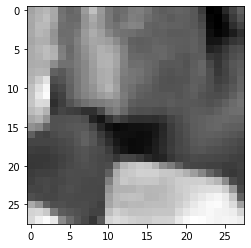

In [47]:
#img28_recovery=np.zeros((28,28))
Foto=np.array(img28_ravel_all.iloc[0]).reshape(28,28)
plt.imshow(Foto, cmap = "gray")